## Initial Imports

In [1]:
import sys
import numpy as np
from scm.plams import Settings, Molecule, Atom, AMSJob, init

# this line is not required in AMS2025+
init()

PLAMS working folder: /path/plams/examples/He2DissociationCurve/plams_workdir


## Setup Dimer
Create Helium atoms and an array of interatomic distances at which to run calculation.

In [2]:
# type of atoms
atom1 = "He"
atom2 = "He"

In [3]:
# interatomic distance values
dmin = 2.2
dmax = 4.2
step = 0.2

In [4]:
# create a list with interatomic distances
distances = np.arange(dmin, dmax, step)

## Calculation Settings

The calculation settings are stored in a `Settings` object.

In [5]:
# calculation parameters (single point, TZP/PBE+GrimmeD3)
sett = Settings()
sett.input.ams.task = "SinglePoint"
sett.input.adf.basis.type = "TZP"
sett.input.adf.xc.gga = "PBE"
sett.input.adf.xc.dispersion = "Grimme3"

## Create and Run Jobs

For each interatomic distance, create a Helium dimer molecule with the required geometry then the single point energy calculation job. Run the job and extract the energy. 

In [6]:
jobs = []
for d in distances:
    mol = Molecule()
    mol.add_atom(Atom(symbol=atom1, coords=(0.0, 0.0, 0.0)))
    mol.add_atom(Atom(symbol=atom2, coords=(d, 0.0, 0.0)))
    job = AMSJob(molecule=mol, settings=sett, name=f"dist_{d:.2f}")
    jobs.append(job)
    job.run()

[11.02|16:54:46] JOB dist_2.20 STARTED
[11.02|16:54:46] JOB dist_2.20 RUNNING
[11.02|16:54:49] JOB dist_2.20 FINISHED
[11.02|16:54:49] JOB dist_2.20 SUCCESSFUL
[11.02|16:54:49] JOB dist_2.40 STARTED
[11.02|16:54:49] JOB dist_2.40 RUNNING
[11.02|16:54:51] JOB dist_2.40 FINISHED
[11.02|16:54:51] JOB dist_2.40 SUCCESSFUL
[11.02|16:54:51] JOB dist_2.60 STARTED
[11.02|16:54:51] JOB dist_2.60 RUNNING
[11.02|16:54:54] JOB dist_2.60 FINISHED
[11.02|16:54:54] JOB dist_2.60 SUCCESSFUL
[11.02|16:54:54] JOB dist_2.80 STARTED
[11.02|16:54:54] JOB dist_2.80 RUNNING
[11.02|16:54:57] JOB dist_2.80 FINISHED
[11.02|16:54:57] JOB dist_2.80 SUCCESSFUL
[11.02|16:54:57] JOB dist_3.00 STARTED
[11.02|16:54:57] JOB dist_3.00 RUNNING
[11.02|16:55:00] JOB dist_3.00 FINISHED
[11.02|16:55:00] JOB dist_3.00 SUCCESSFUL
[11.02|16:55:00] JOB dist_3.20 STARTED
[11.02|16:55:00] JOB dist_3.20 RUNNING
[11.02|16:55:03] JOB dist_3.20 FINISHED
[11.02|16:55:03] JOB dist_3.20 SUCCESSFUL
[11.02|16:55:03] JOB dist_3.40 STARTED
[

## Results

Print table of results of the distance against the calculated energy.

In [7]:
print("== Results ==")
try:
    # For AMS2025+ can use JobAnalysis class to perform results analysis
    from scm.plams import JobAnalysis

    ja = (
        JobAnalysis(jobs=jobs, standard_fields=None)
        .add_field("Dist", lambda j: j.molecule[2].x, display_name="d[A]", fmt=".2f")
        .add_field("Energy", lambda j: j.results.get_energy(unit="kcal/mol"), display_name="E[kcal/mol]", fmt=".3f")
    )

    # Pretty-print if running in a notebook
    if "ipykernel" in sys.modules:
        ja.display_table()
    else:
        print(ja.to_table())

    energies = ja.Energy

except ImportError:

    energies = [j.results.get_energy(unit="kcal/mol") for j in jobs]

    print("d[A]    E[kcal/mol]")
    for d, e in zip(distances, energies):
        print(f"{d:.2f}    {e:.3f}")

== Results ==


| d[A] | E[kcal/mol] |
|------|-------------|
| 2.20 | 0.230       |
| 2.40 | -0.054      |
| 2.60 | -0.127      |
| 2.80 | -0.122      |
| 3.00 | -0.094      |
| 3.20 | -0.066      |
| 3.40 | -0.045      |
| 3.60 | -0.030      |
| 3.80 | -0.020      |
| 4.00 | -0.013      |

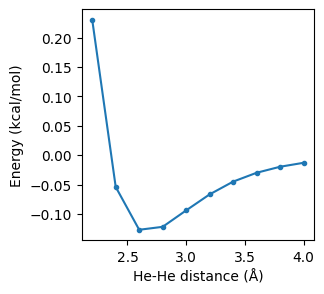

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3, 3))
ax.plot(distances, energies, ".-")
ax.set_xlabel("He-He distance (Å)")
ax.set_ylabel("Energy (kcal/mol)");